In [1]:
import os
import pandas as pd
import math
import numpy as np
pd.set_option("display.max_columns", 100)

In [2]:
csvfilepath = "./csvfiles/"
filename = "finalwithvte.csv"

fullpath = os.path.join(csvfilepath,filename)
df = pd.read_csv(fullpath)
df

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,label,count,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location_x,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,real_age,input,first_day_sofa,age_score,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,chronic_pulmonary_disease,peptic_ulcer_disease,renal_disease,severe_liver_disease,charlson_comorbidity_index,avg_pl,age,weight_admit,weight,weight_min,weight_max,avgw,avg_creat,creat_score,discharge_location_y,died,if_antithrombotic_agents,if_vasopressin,have_at_least_1_ventil,have_vte,HIT,major_bleeding,have_sepsis,encoded_input,have_diabetes,have_cancer,creat_clr
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,Heparin Sodium (Prophylaxis),1.0,2157-11-18 22:56:00,2157-11-25 18:00:00,NaN,EW EMER.,P4645A,EMERGENCY ROOM,HOME HEALTH CARE,Other,?,MARRIED,WHITE,2157-11-18 17:38:00,2157-11-19 01:24:00,0,F,55,2157,2011 - 2013,NaN,55,Heparin,0.0,1,0,0,0,0,0,0,0,0,1,349.33,55,71.2,71.200000,71.2,71.2,71.20,0.57,147.465887,HOME HEALTH CARE,0,0,0,1,0,0,0,0,1,0,0,1
1,10002155,28994087,31090461,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2130-09-24 00:50:00,2130-09-27 22:13:41,3.891447,Heparin Sodium (Prophylaxis),1.0,2130-09-23 21:59:00,2130-09-29 18:55:00,NaN,EW EMER.,P3529J,EMERGENCY ROOM,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,2130-09-23 19:59:00,2130-09-24 00:50:00,0,F,80,2128,2008 - 2010,2131-03-10,82,Heparin,5.0,4,1,1,0,0,0,0,1,0,10,271.80,82,48.0,48.000000,48.0,48.0,48.00,2.38,16.246499,HOME HEALTH CARE,0,0,0,1,0,0,0,0,1,0,1,0
2,10002428,23473524,35479615,Surgical Intensive Care Unit (SICU),Medical Intensive Care Unit (MICU),2156-05-11 14:49:34,2156-05-22 14:16:46,10.977222,Heparin Sodium (Prophylaxis),1.0,2156-05-11 14:49:00,2156-05-22 14:16:00,NaN,EW EMER.,P3529J,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,WIDOWED,WHITE,2156-05-11 11:29:00,2156-05-11 16:53:00,0,F,80,2155,2011 - 2013,NaN,81,Heparin,4.0,4,0,1,0,0,0,0,0,0,6,217.15,81,48.4,48.966667,48.4,50.1,50.45,0.33,125.275673,CHRONIC/LONG TERM ACUTE CARE,0,0,0,1,0,0,0,1,1,0,0,1
3,10003019,22774359,30676350,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2175-10-08 18:58:00,2175-10-09 11:59:16,0.709213,Heparin Sodium (Prophylaxis),1.0,2175-10-08 13:56:00,2175-10-17 17:30:00,NaN,EW EMER.,P039RH,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,2175-10-08 10:10:00,2175-10-08 18:58:00,0,M,69,2171,2008 - 2010,NaN,73,Heparin,3.0,3,0,0,0,0,0,0,0,0,5,209.62,73,68.0,68.000000,68.0,68.0,68.00,1.18,53.625235,HOME HEALTH CARE,0,0,0,0,0,0,0,1,1,0,1,1
4,10003400,20214994,32128372,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2137-02-25 23:37:19,2137-03-10 21:29:36,12.911308,Heparin Sodium (Prophylaxis),1.0,2137-02-24 10:00:00,2137-03-19 15:45:00,NaN,URGENT,P60ZCO,TRANSFER FROM SKILLED NURSING FACILITY,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,NaN,NaN,0,F,72,2134,2011 - 2013,2137-09-02,75,Heparin,22.0,3,0,1,0,0,0,0,1,0,8,79.55,75,93.0,94.133333,93.0,96.4,95.91,0.80,108.231771,CHRONIC/LONG TERM ACUTE CARE,0,0,0,1,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,19997293,20208898,31629173,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2123-10-12 21:55:18,2123-10-18 02:05:38,5.173843,Heparin Sodium (Prophylaxis),1.0,2123-10-12 13:46:00,2123-10-30 15:13:00,NaN,URGENT,P77SO2

In [3]:
#check if there is same number of unique subject id#
UniqueSubjectIDs = pd.unique(df['subject_id'])
print("Number of subjects:",len(UniqueSubjectIDs))

Number of subjects: 7954


In [4]:
#Get 2 lists of subjectID, Heparin vs Enoxaparin#
heparinID = pd.unique(df.loc[df['input'] == "Heparin", 'subject_id']).tolist()
print("Number of subjects for hepa",len(heparinID))
enoxaparinID = pd.unique(df.loc[df['input'] == "Enoxaparin", 'subject_id']).tolist()
print("Number of subjects for enox",len(enoxaparinID))

Number of subjects for hepa 7638
Number of subjects for enox 316


## Before PSM, select required covariates first

In [5]:
dataset_cols = ['subject_id', 'hadm_id', 'gender', 'real_age','weight', 'first_careunit',
              'if_antithrombotic_agents','first_day_sofa',
              'myocardial_infarct', 'congestive_heart_failure',
               'peripheral_vascular_disease', 'cerebrovascular_disease',
               'chronic_pulmonary_disease', 'peptic_ulcer_disease', 'have_diabetes',
                'renal_disease', 'have_cancer',
               'severe_liver_disease',
               'charlson_comorbidity_index', 'avg_creat', 'creat_score','avg_pl',
               'if_vasopressin', 'have_at_least_1_ventil', 'have_vte', 'HIT', 'major_bleeding', 'have_sepsis',
               'encoded_input']
#Note subject id should be omitted for training etc, included here for identification purposes#
dataset = df[dataset_cols]
heparinID = pd.unique(dataset.loc[df['encoded_input'] == 1, 'subject_id']).tolist()
print("Number of subjects for hepa",len(heparinID))
enoxaparinID = pd.unique(df.loc[df['encoded_input'] == 0, 'subject_id']).tolist()
print("Number of subjects for enox",len(enoxaparinID))

Number of subjects for hepa 7638
Number of subjects for enox 316


## Drop rows with missing data

In [6]:
dataset = dataset.dropna()
print("After dropping rows with missing data:")
heparinID = pd.unique(dataset.loc[df['encoded_input'] == 1, 'subject_id']).tolist()
print("Number of subjects for hepa",len(heparinID))
enoxaparinID = pd.unique(df.loc[df['encoded_input'] == 0, 'subject_id']).tolist()
print("Number of subjects for enox",len(enoxaparinID))
dataset

After dropping rows with missing data:
Number of subjects for hepa 7536
Number of subjects for enox 316


,subject_id,hadm_id,gender,real_age,weight,first_careunit,if_antithrombotic_agents,first_day_sofa,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,chronic_pulmonary_disease,peptic_ulcer_disease,have_diabetes,renal_disease,have_cancer,severe_liver_disease,charlson_comorbidity_index,avg_creat,creat_score,avg_pl,if_vasopressin,have_at_least_1_ventil,have_vte,HIT,major_bleeding,have_sepsis,encoded_input
0,10001217,24597018,F,55,71.200000,Surgical Intensive Care Unit (SICU),0,0.0,0,0,0,0,0,0,0,0,0,0,1,0.57,147.465887,349.33,0,1,0,0,0,0,1
1,10002155,28994087,F,82,48.000000,Medical/Surgical Intensive Care Unit (MICU/SICU),0,5.0,1,1,0,0,0,0,0,1,1,0,10,2.38,16.246499,271.80,0,1,0,0,0,0,1
2,10002428,23473524,F,81,48.966667,Surgical Intensive Care Unit (SICU),0,4.0,0,1,0,0,0,0,0,0,0,0,6,0.33,125.275673,217.15,0,1,0,0,0,1,1
3,10003019,22774359,M,73,68.000000,Medical/Surgical Intensive Care Unit (MICU/SICU),0,3.0,0,0,0,0,0,0,0,0,1,0,5,1.18,53.625235,209.62,0,0,0,0,0,1,1
4,10003400,20214994,F,75,94.133333,Medical/Surgical Intensive Care Unit (MICU/SICU),0,22.0,0,1,0,0,0,0,0,1,1,0,8,0.80,108.231771,79.55,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,19997293,20208898,M,76,134.500000,Surgical Intensive Care Unit (SICU),0,9.0,1,1,1,0,1,0,1,1,0,0,12,1.05,105.820106,264.00,0,1,0,0,0,0,1
7950,19999068,21606769,M,63,55.800000,Medical/Surgical Intensive Care Unit (MICU/SICU),0,5.0,0,0,0,0,0,0,0,0,0,0,3,0.65,85.275855,154.50,0,1,0,0,0,0,1
7951,19999287,22997012,F,77,93.600000,Medical/Surgical Intensive Care Unit (MICU/SICU),0,1.0,0,0,0,0,1,0,1,0,1,0,7,0.85,96.352941,269.50,0,1,0,0,0,0,1
7952,19999442,26785317,M,43,107.500000,Surgical Intensive Care Unit (SICU),0,3.0,0,0,0,1,1,0,0,0,0,0,4,0.72,191.735918,130.92,0,1,0,0,0,0,1


## Some more preprocessing:
  ### 1. Scaling on selected columns
  ### 2. One-hot encoding on selected categorical columns


In [7]:
for cols in dataset:
  print(cols,len(np.unique(dataset[cols].values)))
dataset.head()

subject_id 7847
hadm_id 7847
gender 2
real_age 83
weight 1806
first_careunit 2
if_antithrombotic_agents 2
first_day_sofa 22
myocardial_infarct 2
congestive_heart_failure 2
peripheral_vascular_disease 2
cerebrovascular_disease 2
chronic_pulmonary_disease 2
peptic_ulcer_disease 2
have_diabetes 2
renal_disease 2
have_cancer 2
severe_liver_disease 2
charlson_comorbidity_index 20
avg_creat 590
creat_score 7768
avg_pl 5412
if_vasopressin 2
have_at_least_1_ventil 2
have_vte 2
HIT 2
major_bleeding 2
have_sepsis 2
encoded_input 2


,subject_id,hadm_id,gender,real_age,weight,first_careunit,if_antithrombotic_agents,first_day_sofa,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,chronic_pulmonary_disease,peptic_ulcer_disease,have_diabetes,renal_disease,have_cancer,severe_liver_disease,charlson_comorbidity_index,avg_creat,creat_score,avg_pl,if_vasopressin,have_at_least_1_ventil,have_vte,HIT,major_bleeding,have_sepsis,encoded_input
0,10001217,24597018,F,55,71.200000,Surgical Intensive Care Unit (SICU),0,0.0,0,0,0,0,0,0,0,0,0,0,1,0.57,147.465887,349.33,0,1,0,0,0,0,1
1,10002155,28994087,F,82,48.000000,Medical/Surgical Intensive Care Unit (MICU/SICU),0,5.0,1,1,0,0,0,0,0,1,1,0,10,2.38,16.246499,271.80,0,1,0,0,0,0,1
2,10002428,23473524,F,81,48.966667,Surgical Intensive Care Unit (SICU),0,4.0,0,1,0,0,0,0,0,0,0,0,6,0.33,125.275673,217.15,0,1,0,0,0,1,1
3,10003019,22774359,M,73,68.000000,Medical/Surgical Intensive Care Unit (MICU/SICU),0,3.0,0,0,0,0,0,0,0,0,1,0,5,1.18,53.625235,209.62,0,0,0,0,0,1,1
4,10003400,20214994,F,75,94.133333,Medical/Surgical Intensive Care Unit (MICU/SICU),0,22.0,0,1,0,0,0,0,0,1,1,0,8,0.80,108.231771,79.55,0,1,1,0,0,0,1


In [8]:
from sklearn.preprocessing import StandardScaler

#columns with 1 or 0 don't need to one-hot encode#
categorical = ["gender", "first_careunit"]
non_cat = ["real_age","weight","first_day_sofa",
           "congestive_heart_failure","have_cancer", "severe_liver_disease",
           "have_at_least_1_ventil", "have_sepsis", "have_diabetes","avg_creat", "encoded_input"]

#convert categorical to one-hot#
df_cat = dataset[categorical]
df_cat_one_hot = pd.get_dummies(df_cat,prefix="oh",prefix_sep="-")

#scale continuous variables, did not include SOFA since it's a assessment measure#
scaledDataset = dataset
sc = StandardScaler()
#only choose cols that have float values and are not indexes i.e. SOFA or Comorbidity Index#
cols_to_scale = ['real_age', 'weight','avg_creat']
scaledDataset[cols_to_scale] = sc.fit_transform(dataset[cols_to_scale])
cols_to_max_scale = ['first_day_sofa']
scaledDataset[cols_to_max_scale] = dataset[cols_to_max_scale]/dataset[cols_to_max_scale].max()


df_non_cat = scaledDataset[non_cat]
processed_df = pd.concat([df_cat_one_hot, df_non_cat],axis=1)

In [9]:
processed_df

,oh-F,oh-M,oh-Medical/Surgical Intensive Care Unit (MICU/SICU),oh-Surgical Intensive Care Unit (SICU),real_age,weight,first_day_sofa,congestive_heart_failure,have_cancer,severe_liver_disease,have_at_least_1_ventil,have_sepsis,have_diabetes,avg_creat,encoded_input
0,1,0,0,1,-0.483433,-0.383551,0.000000,0,0,0,1,0,0,-0.543856,1
1,1,0,1,0,1.089232,-1.286703,0.227273,1,1,0,1,0,0,0.845100,1
2,1,0,0,1,1.030985,-1.249072,0.181818,1,0,0,1,1,0,-0.728027,1
3,0,1,1,0,0.565010,-0.508124,0.136364,0,1,0,0,1,0,-0.075755,1
4,1,0,1,0,0.681504,0.509220,1.000000,1,1,0,1,0,0,-0.367359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,0,1,0,1,0.739751,2.080653,0.409091,1,0,0,1,0,1,-0.175514,1
7950,0,1,1,0,-0.017458,-0.983057,0.227273,0,0,0,1,0,0,-0.482466,1
7951,1,0,1,0,0.797998,0.488458,0.045455,0,1,0,1,0,1,-0.328990,1
7952,0,1,0,1,-1.182396,1.029571,0.136364,0,0,0,1,0,0,-0.428750,1


## Start of training and propensity score matching

### Training of logistic regression model is just to get a sensing of the class "imbalanceness" in the dataset. 

### As seen from the macro F1-score of 0.47 vs the way higher accuracy of 0.69, we can expect the matching with PSM to be very challenging for the treatment group.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
import random
random.seed(0)

#A function that infers using sklearn model class. Results and metrics will be printed out.#
def printMetrics(modelname, model, tr_x, tr_y, te_x, te_y):
  y_train_pred = model.predict(tr_x)
  y_test_pred = model.predict(te_x)
  root_mse_train = mean_squared_error(tr_y,y_train_pred)**0.5
  root_mse_test = mean_squared_error(te_y,y_test_pred)**0.5
  f_1_train = f1_score(tr_y,y_train_pred,average='macro')
  f_1_test = f1_score(te_y,y_test_pred,average='macro')
  acc_train = accuracy_score(tr_y, y_train_pred)
  acc_test = accuracy_score(te_y, y_test_pred)
  print("Performing {} on all inputs yields a macro f1 score of: {:.4f} (train) and {:.4f} (test)".format(modelname,f_1_train,f_1_test))
  print("Performing {} on all inputs yields an accuracy of: {:.4f} (train) and {:.4f} (test)".format(modelname,acc_train,acc_test))
  print("Root Mean Squared Error (lower is better): {:.4f} (train) and {:.4f} (test)\n".format(root_mse_train,root_mse_test))
  print("Confusion Metric Train:\n", confusion_matrix(tr_y, y_train_pred))
  print("Confusion Metric Test:\n", confusion_matrix(te_y, y_test_pred))


In [11]:
#Encode label and make datasets#
label = {"Enoxaparin": 0, "Heparin": 1}
train, test = train_test_split(processed_df, test_size=0.2, random_state=99)
x_train = train.iloc[:,:-1].values
y_train = train['encoded_input'].values
x_test = test.iloc[:,:-1].values
y_test = test['encoded_input'].values


#using macro F1-score since both labels are equally important#
clf = LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced')
clf.fit(x_train, y_train)
printMetrics("Logistic Regression", clf, x_train, y_train, x_test, y_test)

Performing Logistic Regression on all inputs yields a macro f1 score of: 0.4884 (train) and 0.4773 (test)
Performing Logistic Regression on all inputs yields an accuracy of: 0.6936 (train) and 0.6949 (test)
Root Mean Squared Error (lower is better): 0.5535 (train) and 0.5524 (test)

Confusion Metric Train:
 [[ 189   67]
 [1856 4165]]
Confusion Metric Test:
 [[  39   16]
 [ 463 1052]]


## Initial test: PSM using K-Nearest Neighbour, 1:20. Class Weights Balanced Logistic Regression Model is also used

In [ ]:
#Consider using this for other matching methods#
!pip install psmpy
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)}, font_scale = 1.3)
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [13]:
processed_df['subject_id'] = dataset['subject_id']
psm = PsmPy(processed_df, treatment='encoded_input', indx='subject_id', exclude = [])
psm.logistic_ps(balance = True)

In [14]:
psm.knn_matched_12n(matcher='propensity_logit', how_many=10)
psm_new_cohort_df_KNN = psm.df_matched
# psm_new_cohort_df_KNN = psm_new_cohort_df_KNN.drop('propensity_logit', axis=1)
# # psm_new_cohort_df_KNN = psm_new_cohort_df_KNN.drop('matched_ID', axis=1)
# psm_new_cohort_df_KNN = psm_new_cohort_df_KNN.drop('propensity_score', axis=1)

df = pd.read_csv(fullpath)
df['deathtime'] = pd.to_datetime(df['deathtime'])
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['mortality'] = df['deathtime'] -df['admittime']
df['mortality'] = df['mortality'].fillna(pd.Timedelta(0))
df['length_of_stay'] = df['dischtime'] -df['admittime']
df['length_of_stay'] = df['length_of_stay'].fillna(pd.Timedelta(0))
df = df.drop(columns=['deathtime'])
dataset = df[dataset_cols]
dataset = dataset.dropna()
subject_ids = psm_new_cohort_df_KNN['subject_id'].tolist()
balanced_dataset2 = df[df['subject_id'].isin(subject_ids)]
balanced_dataset2.to_csv(os.path.join(csvfilepath,'finalwithvte_balanced_13Apr.csv'),index=False)

psm_new_cohort_df_KNN = psm_new_cohort_df_KNN.drop('subject_id', axis=1)
train, test = train_test_split(psm_new_cohort_df_KNN, test_size=0.2, random_state=99)
x_train = train.iloc[:,:-1]
y_train = train['encoded_input']
x_test = test.iloc[:,:-1]
y_test = test['encoded_input']

Performing Logistic Regression on all inputs yields a macro f1 score of: 0.4579 (train) and 0.4305 (test)
Performing Logistic Regression on all inputs yields an accuracy of: 0.5906 (train) and 0.5547 (test)
Root Mean Squared Error (lower is better): 0.6398 (train) and 0.6673 (test)

Confusion Metric Train:
 [[ 131  108]
 [1012 1485]]
Confusion Metric Test:
 [[ 30  42]
 [263 350]]


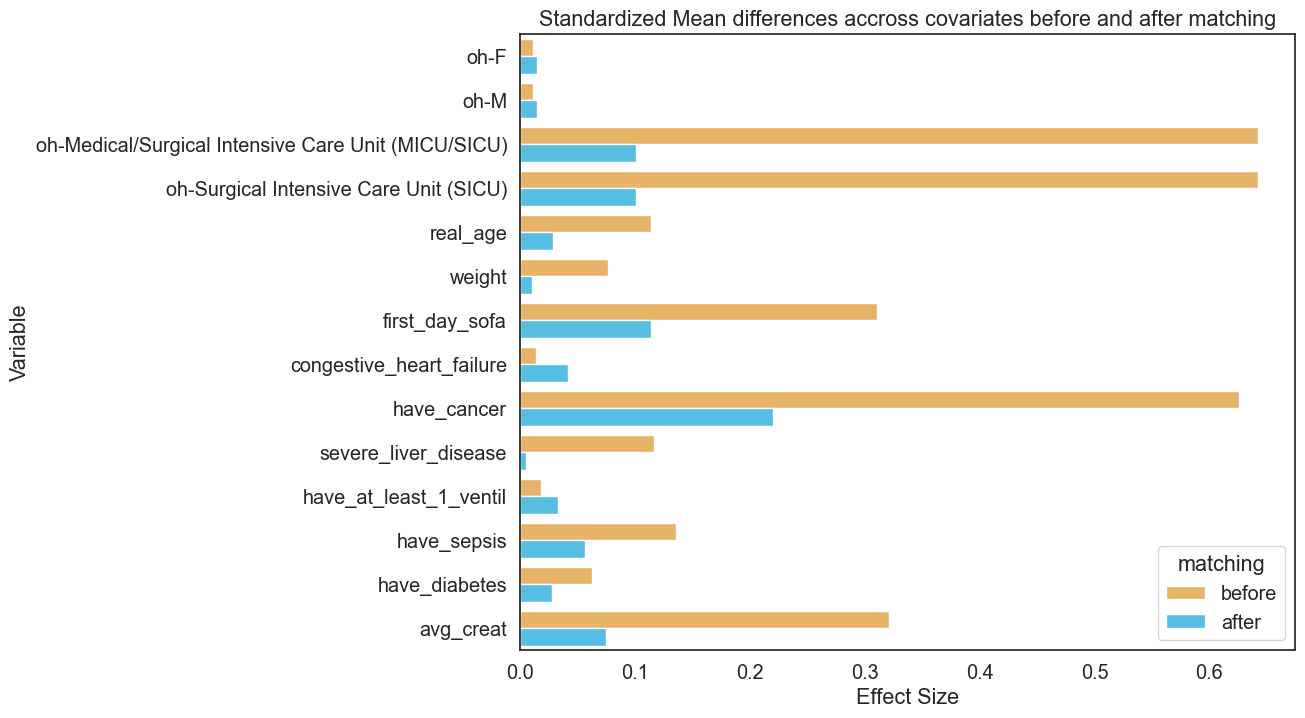

In [15]:
#using macro F1-score since both labels are equally important#
clf = LogisticRegression(random_state=0, max_iter=1000,class_weight='balanced')
clf.fit(x_train, y_train)
printMetrics("Logistic Regression", clf, x_train, y_train, x_test, y_test)
psm.effect_size_plot(save=False)

## Investigate varying N
### Due to bad matching and some of the SMD effect sizes are still > 0.25 we try to use a lower N-ratio.
### An alternative is to use a caliper with some stddev threshold to reject bad matches, but reducing N is a more direct way.

4


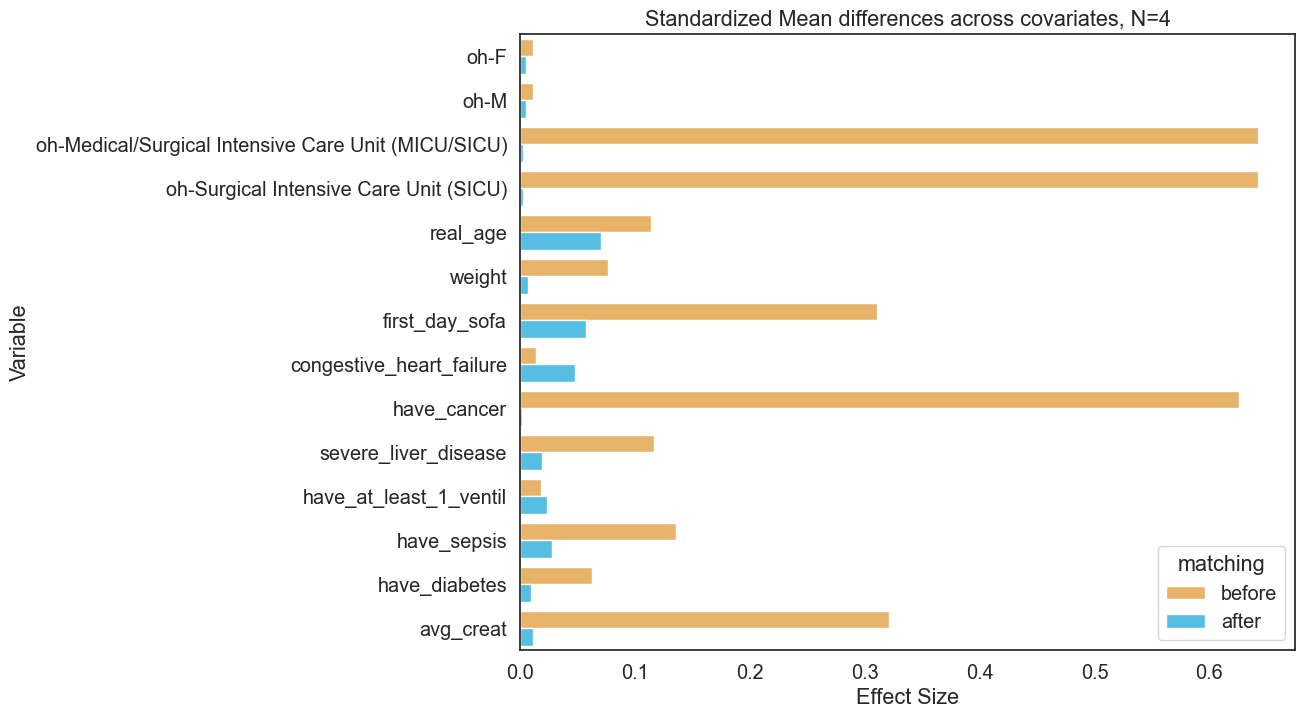

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

n_ratios_to_test = [20,18,16,14,12,10,8,6,4]

for n in [n_ratios_to_test]:
    print(n)
    psm.knn_matched_12n(matcher='propensity_logit', how_many=n)
    psm_new_cohort_df_KNN = psm.df_matched
    df_plot = psm_new_cohort_df_KNN[['propensity_score', 'encoded_input']]
    enox = df_plot[df_plot['encoded_input'].isin([0])]['propensity_score']
    hepa = df_plot[df_plot['encoded_input'].isin([1])]['propensity_score']
    sns.kdeplot(enox,color='red')
    sns.kdeplot(hepa,color='blue')
    plt.ylim(0,5)
    plt.legend(['Enoxaparin', 'Heparin'])
    plt.title("1:N="+str(n))
    plt.savefig(os.path.join("./test"+str(n).zfill(3)+".png"))
    plt.cla()
    psm.effect_size_plot(title="Standardized Mean differences across covariates, N="+str(n),save=True)

## Calculations for before and after PSM for Baseline characteristics for Table 1

In [17]:
#Function to count stuff, count it by unique subjects#
def countNumericalStuff(df, listID, targetColumn):
  skippedCount = 0
  lst = [] #list to accumulate valid results#
  for id in listID:
    val = df.loc[df['subject_id'] == id, targetColumn].values[0]
    if not math.isnan(val):
      lst.append(val)
    else:
      skippedCount+=1
  return round(np.mean(lst),4), round(np.std(lst),4), skippedCount

def calcSSMD(res1,res2):
  #res->[mean, stdev,skipped]#
  #assuming both grps are independent#
  return abs(round((res1[0]-res2[0])/math.sqrt(res1[1]**2.+res2[1]**2.),6))


fullpath = os.path.join(csvfilepath,filename)
df = pd.read_csv(fullpath)

print("Original Imbalanced Dataset baseline characteristics\n")

HepaAge = countNumericalStuff(df, heparinID, "age")
EnoxAge = countNumericalStuff(df, enoxaparinID, "age")
SSMD_Age = calcSSMD(HepaAge,EnoxAge)
print("Age: Hepa mean =", HepaAge[0], "Enox mean =", EnoxAge[0], "SSMD =", SSMD_Age)
print("Age: Hepa stdev =", HepaAge[1], "Enox stdev =", EnoxAge[1])


HepaWt = countNumericalStuff(df, heparinID, "avgw")
EnoxWt = countNumericalStuff(df, enoxaparinID, "avgw")
SSMD_Wt = calcSSMD(HepaWt,EnoxWt)
print("Wt: Hepa mean =", HepaWt[0], "Enox mean =", EnoxWt[0], "SSMD =", SSMD_Wt)
print("Wt: Hepa stdev =", HepaWt[1], "Enox stdev =", EnoxWt[1])


HepaCreatine = countNumericalStuff(df, heparinID, "avg_creat")
EnoxCreatine = countNumericalStuff(df, enoxaparinID, "avg_creat")
SSMD_Creatine = calcSSMD(HepaCreatine,EnoxCreatine)
print("Creatine: Hepa mean =", HepaCreatine[0], "Enox mean =", EnoxCreatine[0], "SSMD =", SSMD_Creatine)
print("Creatine: Hepa stdev =", HepaCreatine[1], "Enox stdev =", EnoxCreatine[1])

HepaPlatelet = countNumericalStuff(df, heparinID, "avg_pl")
EnoxPlatelet = countNumericalStuff(df, enoxaparinID, "avg_pl")
SSMD_Platelet = calcSSMD(HepaPlatelet,EnoxPlatelet)
print("Platelet: Hepa mean =", HepaPlatelet[0], "Enox mean =", EnoxPlatelet[0], "SSMD =", SSMD_Platelet)
print("Platelet: Hepa stdev =", HepaPlatelet[1], "Enox stdev =", EnoxPlatelet[1])

#Function to count categorical stuff, count it by unique subjects#
def countCategoricalStuff(df, listID, targetColumn, isUnique=True):
  countResults = {}
  #UniqueSubjectIDs = pd.unique(df['subject_id'])
  for id in listID:
    res_list = []
    if isUnique:
      res_list.append(df.loc[df['subject_id'] == id, targetColumn].values[0])
    else:
      res_list = df.loc[df['subject_id'] == id, targetColumn].values
    
    for res in res_list:
      if res in countResults:
        countResults[res]+=1
      else:
        countResults[res]=1
  return countResults

MV_Hepa = countCategoricalStuff(df,heparinID, targetColumn='have_at_least_1_ventil')
MV_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='have_at_least_1_ventil')
print("Hepa Mechanical ventilation", MV_Hepa)
print("Enox Mechanical ventilation", MV_Enox)

Vasopressor_Hepa = countCategoricalStuff(df,heparinID, targetColumn='if_vasopressin')
Vasopressor_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='if_vasopressin')
print("Hepa Vaso", Vasopressor_Hepa)
print("Enox Vaso", Vasopressor_Enox)


Cancer_Hepa = countCategoricalStuff(df,heparinID, targetColumn='have_cancer')
Cancer_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='have_cancer')
print("Hepa Cancer", Cancer_Hepa)
print("Enox Cancer", Cancer_Enox)

Gender_Hepa = countCategoricalStuff(df,heparinID, targetColumn='gender')
Gender_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='gender')
print("Hepa Gender", Gender_Hepa)
print("Enox Gender", Gender_Enox)

ICU_Hepa = countCategoricalStuff(df,heparinID, targetColumn='last_careunit')
ICU_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='last_careunit')
print("Hepa ICU", ICU_Hepa)
print("Enox ICU", ICU_Enox)


print("\nBalanced Dataset baseline characteristics\n")

df = pd.read_csv(os.path.join(csvfilepath,'finalwithvte_balanced_13Apr.csv'))

#Get 2 lists of subjectID, Heparin vs Enoxaparin#
heparinID = pd.unique(df.loc[df['input'] == "Heparin", 'subject_id']).tolist()
print("Number of subjects for hepa",len(heparinID))
enoxaparinID = pd.unique(df.loc[df['input'] == "Enoxaparin", 'subject_id']).tolist()
print("Number of subjects for enox",len(enoxaparinID))

HepaAge = countNumericalStuff(df, heparinID, "age")
EnoxAge = countNumericalStuff(df, enoxaparinID, "age")
SSMD_Age = calcSSMD(HepaAge,EnoxAge)
print("Age: Hepa mean =", HepaAge[0], "Enox mean =", EnoxAge[0], "SSMD =", SSMD_Age)
print("Age: Hepa stdev =", HepaAge[1], "Enox stdev =", EnoxAge[1])


HepaWt = countNumericalStuff(df, heparinID, "avgw")
EnoxWt = countNumericalStuff(df, enoxaparinID, "avgw")
SSMD_Wt = calcSSMD(HepaWt,EnoxWt)
print("Wt: Hepa mean =", HepaWt[0], "Enox mean =", EnoxWt[0], "SSMD =", SSMD_Wt)
print("Wt: Hepa stdev =", HepaWt[1], "Enox stdev =", EnoxWt[1])


HepaCreatine = countNumericalStuff(df, heparinID, "avg_creat")
EnoxCreatine = countNumericalStuff(df, enoxaparinID, "avg_creat")
SSMD_Creatine = calcSSMD(HepaCreatine,EnoxCreatine)
print("Creatine: Hepa mean =", HepaCreatine[0], "Enox mean =", EnoxCreatine[0], "SSMD =", SSMD_Creatine)
print("Creatine: Hepa stdev =", HepaCreatine[1], "Enox stdev =", EnoxCreatine[1])

HepaPlatelet = countNumericalStuff(df, heparinID, "avg_pl")
EnoxPlatelet = countNumericalStuff(df, enoxaparinID, "avg_pl")
SSMD_Platelet = calcSSMD(HepaPlatelet,EnoxPlatelet)
print("Platelet: Hepa mean =", HepaPlatelet[0], "Enox mean =", EnoxPlatelet[0], "SSMD =", SSMD_Platelet)
print("Platelet: Hepa stdev =", HepaPlatelet[1], "Enox stdev =", EnoxPlatelet[1])


MV_Hepa = countCategoricalStuff(df,heparinID, targetColumn='have_at_least_1_ventil')
MV_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='have_at_least_1_ventil')
print("Hepa Mechanical ventilation", MV_Hepa)
print("Enox Mechanical ventilation", MV_Enox)

Vasopressor_Hepa = countCategoricalStuff(df,heparinID, targetColumn='if_vasopressin')
Vasopressor_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='if_vasopressin')
print("Hepa Vaso", Vasopressor_Hepa)
print("Enox Vaso", Vasopressor_Enox)

Cancer_Hepa = countCategoricalStuff(df,heparinID, targetColumn='have_cancer')
Cancer_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='have_cancer')
print("Hepa Cancer", Cancer_Hepa)
print("Enox Cancer", Cancer_Enox)

Gender_Hepa = countCategoricalStuff(df,heparinID, targetColumn='gender')
Gender_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='gender')
print("Hepa Gender", Gender_Hepa)
print("Enox Gender", Gender_Enox)



ICU_Hepa = countCategoricalStuff(df,heparinID, targetColumn='last_careunit')
ICU_Enox = countCategoricalStuff(df,enoxaparinID, targetColumn='last_careunit')
print("Hepa ICU", ICU_Hepa)
print("Enox ICU", ICU_Enox)



Original Imbalanced Dataset baseline characteristics

Age: Hepa mean = 63.2221 Enox mean = 65.1329 SSMD = 0.08774
Age: Hepa stdev = 17.3054 Enox stdev = 13.2214
Wt: Hepa mean = 81.4989 Enox mean = 83.2587 SSMD = 0.049077
Wt: Hepa stdev = 25.5015 Enox stdev = 25.2087
Creatine: Hepa mean = 1.2953 Enox mean = 0.8789 SSMD = 0.30272
Creatine: Hepa stdev = 1.325 Enox stdev = 0.3694
Platelet: Hepa mean = 243.6284 Enox mean = 244.6739 SSMD = 0.006156
Platelet: Hepa stdev = 113.6519 Enox stdev = 126.1919
Hepa Mechanical ventilation {1: 6127, 0: 1409}
Enox Mechanical ventilation {1: 259, 0: 57}
Hepa Vaso {0: 7509, 1: 27}
Enox Vaso {0: 314, 1: 2}
Hepa Cancer {0: 5840, 1: 1696}
Enox Cancer {0: 161, 1: 155}
Hepa Gender {'F': 3699, 'M': 3837}
Enox Gender {'M': 162, 'F': 154}
Hepa ICU {'Surgical Intensive Care Unit (SICU)': 3662, 'Medical/Surgical Intensive Care Unit (MICU/SICU)': 3398, 'Medical Intensive Care Unit (MICU)': 299, 'Trauma SICU (TSICU)': 88, 'Coronary Care Unit (CCU)': 62, 'Cardiac Vasc